In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

In [9]:
wine = pd.read_csv('../../assets/datasets/wine_v.csv')
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Varietal
1023,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.30,6,Merlot
156,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.50,5,Merlot
1221,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.50,6,Merlot
1125,8.8,0.240,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.30,7,Merlot
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.20,5,Merlot
290,8.7,0.520,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.60,7,Pinot Noir
1274,7.8,0.580,0.13,2.1,0.102,17.0,36.0,0.99440,3.24,0.53,11.20,6,Merlot
1396,8.7,0.675,0.10,1.6,0.090,4.0,11.0,0.99745,3.31,0.65,9.55,5,Merlot
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.30,7,Merlot
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,Merlot


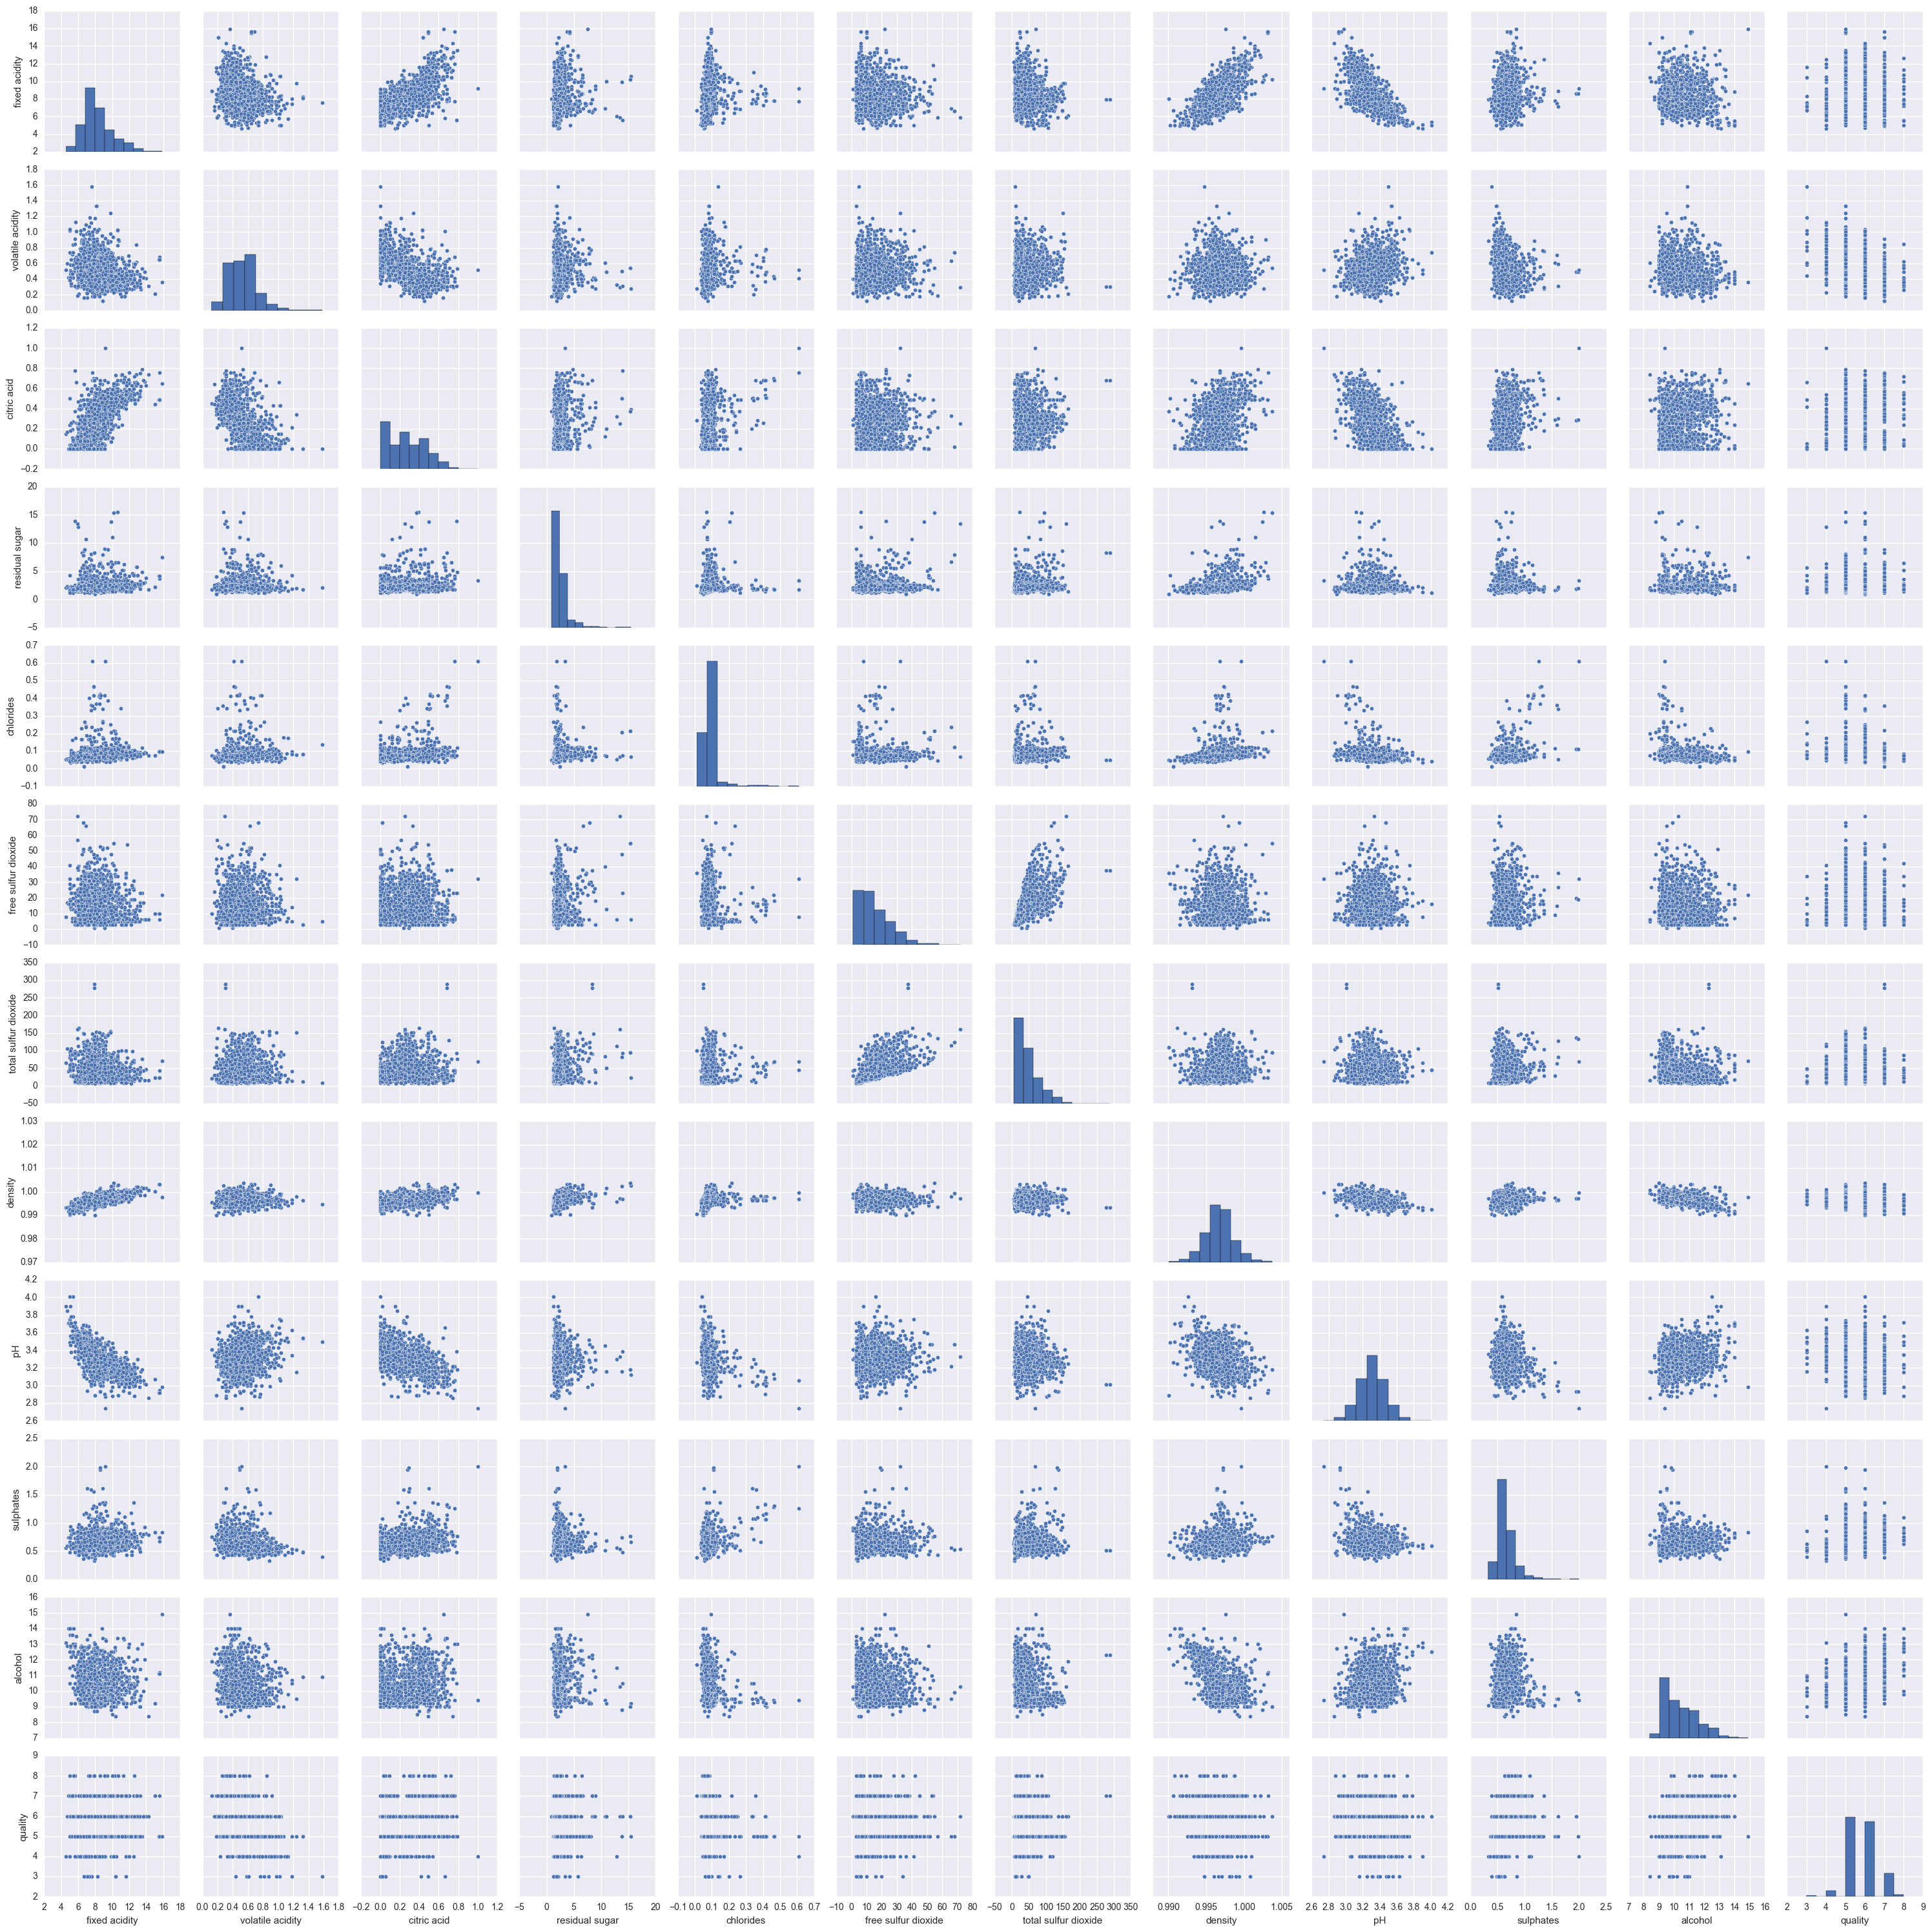

In [7]:
sns.pairplot(wine)

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

## Step 3: Split the data into two sets

Next, split the data into different sets

In [11]:
X = wine.drop('Varietal', axis=1)
Y = wine.Varietal

## Step 4: Dimensionality Reduction & PCA

First, let's standardize the data

In [12]:
X_scale = StandardScaler().fit_transform(X)  #units to standarddeviation
X_scale = pd.DataFrame(X_scale, columns = X.columns)
X_scale

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


Now, let's set up our data for decomposition by creating a covariance matrix

In [13]:
cov_mat = np.cov(X_scale.T)
cov_mat


array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686,  0.12412928],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462, -0.39080218],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202,  0.22651417],
       [ 0.11484855,  0.00191908,  0.14366701,  1.00062578,  0.05564433,
         0.18716605,  0.20315493,  0.3555057 , -0.08570602,  0.00553058,
         0.04210177,  0.01374023],
       [ 0.09376383,  0.06133613,  0.20395046,  0.05564433,  1.00062578,
         0.00556563,  0.04743013,  0.20075788, -0.26519198,  0.37149281,
        -0.22127893, -0.12898723],
       [-0.15389043, -0.0105104 , -0.06101629,  0.18716605,  0.00556563,
         1.00062578,  

Now, decompose the the covariance matrix

In [14]:
eValue, eVector = np.linalg.eig(cov_mat)


In [15]:
print 'Eigenvalues\n' ,eValue
print 'Eigenvectors\n', eVector

Eigenvalues
[ 3.12312087  2.24328497  1.68397283  1.21578121  0.05955516  0.97387267
  0.18033141  0.3281246   0.41156493  0.50618912  0.61870473  0.66300688]
Eigenvectors
[[ 0.48788336 -0.00417321 -0.16482854 -0.23109808 -0.63857976 -0.07877938
  -0.25643792  0.18295601 -0.17457815 -0.20052866  0.30721496 -0.0555313 ]
 [-0.26512898  0.33896786 -0.22708884  0.04185824 -0.00466168  0.29937933
   0.37716123 -0.15510563 -0.06022334 -0.14612614  0.62623369 -0.297287  ]
 [ 0.47333547 -0.1373581   0.10022856 -0.0567358   0.07003691 -0.12014871
   0.62432783 -0.34608556 -0.22097505 -0.29633271 -0.24414858 -0.13663328]
 [ 0.13915442  0.16773634  0.24362014 -0.38303758 -0.18364637  0.70936319
   0.08807787  0.05223656  0.27818728  0.17062614 -0.28385429 -0.10931059]
 [ 0.19742679  0.18978819 -0.02660785  0.65477782 -0.05393118  0.26623723
  -0.20861667  0.00386273 -0.41993639  0.18692254 -0.23054697 -0.33733656]
 [-0.04588071  0.25948314  0.61611132 -0.03371148  0.05192167 -0.15941286
   0.2379

Check the eigenvalues and eigenvectors

In [ ]:
eigenVectors

In [ ]:
eigenValues

Let's create the eigenpairs

In [16]:
ePairs = [(np.abs(eValue[i]), eVector[:,i]) for i in range(len(eValue))]
ePairs

[(3.1231208687681744,
  array([ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
         -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
         -0.07317678,  0.11248878])),
 (2.2432849729241342,
  array([-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
          0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
         -0.50270865, -0.47316621])),
 (1.6839728325484267,
  array([-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
          0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
          0.22497138,  0.22336929])),
 (1.2157812116411921,
  array([-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
         -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
         -0.09170143, -0.03666923])),
 (0.059555162327569293,
  array([-0.63857976, -0.00466168,  0.07003691, -0.18364637, -0.05393118,
          0.05192167, -0.06979295,  0.56664499, -0.34123006, -0.067792

Then, sort and print the eigenpairs from highest to lowest

In [17]:
ePairs.sort()
ePairs.reverse()
ePairs

[(3.1231208687681744,
  array([ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
         -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
         -0.07317678,  0.11248878])),
 (2.2432849729241342,
  array([-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
          0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
         -0.50270865, -0.47316621])),
 (1.6839728325484267,
  array([-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
          0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
          0.22497138,  0.22336929])),
 (1.2157812116411921,
  array([-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
         -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
         -0.09170143, -0.03666923])),
 (0.97387267135316857,
  array([-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
         -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.2148349

Calculate the explained variance

In [18]:
tot = sum(eValue)  #says that pca1 explains %72 of variance pca1 & 
var_exp = [(i / tot)*100 for i in sorted(eValue, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  26.00973081,   44.69208117,   58.71641193,   68.84158587,
         76.95211604,   82.47371808,   87.62636639,   91.84197103,
         95.26953384,   98.00219545,   99.50401736,  100.        ])

Now, let's construct the projection matrix

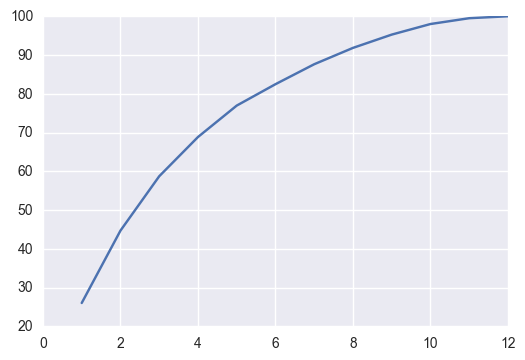

In [20]:
plt.plot(range(1,13), cum_var_exp)

Lastly, let's project the matrix using the dot product

## PCA with Scikit-Learn

In [25]:
pcask = sklearnPCA(n_components=.95)
y_sk = pcask.fit_transform(X_scale)


In [26]:
y_sk # this is what we use to train out=r models

array([[-1.77944158,  1.15730315, -1.38658056, ..., -0.11052758,
         0.04031995, -0.2944202 ],
       [-1.00418467,  2.07183784,  0.00775877, ..., -1.37678974,
        -0.17671393,  0.58734197],
       [-0.91578319,  1.3934342 , -0.69928641, ..., -0.72033805,
        -0.08868663,  0.5464948 ],
       ..., 
       [-1.36626511, -0.51756099,  1.25069637, ..., -0.19603884,
        -0.12115434, -0.10756917],
       [-2.36714672,  0.70354479,  0.89948219, ...,  0.12666899,
         0.60740021, -0.37829801],
       [-0.28877628, -1.24084585,  1.21809517, ...,  1.44341443,
        -0.11542162,  0.16519356]])

In [27]:
pcask.explained_variance_

array([ 3.1211677 ,  2.24188204,  1.68291969,  1.21502087,  0.97326362,
        0.66259224,  0.6183178 ,  0.50587256,  0.41130754])

In [28]:
pcask.explained_variance_ratio_

array([ 0.26009731,  0.1868235 ,  0.14024331,  0.10125174,  0.0811053 ,
        0.05521602,  0.05152648,  0.04215605,  0.03427563])

In [29]:
pcask.components_  #gets eigen vectors

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878],
       [-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
         0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
        -0.50270865, -0.47316621],
       [-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
         0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
         0.22497138,  0.22336929],
       [-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
        -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
        -0.09170143, -0.03666923],
       [-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
        -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.21483493,
         0.25972635,  0.13758414],
       [ 0.0555313 ,  0.297287  ,  0.13663328,  0.10931059,  0.33733656,
        -0.04264807,  

In [35]:
pd.DataFrame(pcask.components_, columns = X_scale.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.487883,-0.265129,0.473335,0.139154,0.197427,-0.045881,0.004067,0.370301,-0.432721,0.254535,-0.073177,0.112489
1,-0.004173,0.338968,-0.137358,0.167736,0.189788,0.259483,0.363971,0.330781,-0.065440,-0.109334,-0.502709,-0.473166
2,-0.164829,-0.227089,0.100229,0.243620,-0.026608,0.616111,0.540732,-0.168723,0.069771,0.212913,0.224971,0.223369
3,-0.231098,0.041858,-0.056736,-0.383038,0.654778,-0.033711,-0.028460,-0.200693,-0.005466,0.560502,-0.091701,-0.036669
4,-0.078779,0.299379,-0.120149,0.709363,0.266237,-0.159413,-0.218453,0.208793,0.257647,0.214835,0.259726,0.137584
5,0.055531,0.297287,0.136633,0.109311,0.337337,-0.042648,0.115954,-0.425667,-0.480354,-0.403743,0.392176,-0.141830
6,-0.307215,-0.626234,0.244149,0.283854,0.230547,-0.138260,-0.110209,-0.122546,0.185692,-0.233402,-0.121719,-0.412388
7,0.200529,0.146126,0.296333,-0.170626,-0.186923,-0.019356,0.089897,0.079500,0.314693,0.275492,0.471189,-0.612247
8,-0.174578,-0.060223,-0.220975,0.278187,-0.419936,-0.318000,0.121823,-0.249074,-0.461916,0.452689,-0.096528,-0.240243
